In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
uploaded = files.upload()

Saving compresive_strength_concrete.csv to compresive_strength_concrete.csv


In [6]:
import io
data = pd.read_csv(io.BytesIO(uploaded['compresive_strength_concrete.csv']))
# Dataset is now stored in a Pandas Dataframe

In [7]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [9]:
data = data.rename(columns={"Cement (component 1)(kg in a m^3 mixture)":"cement",
                        "Blast Furnace Slag (component 2)(kg in a m^3 mixture)":"slag",
                        "Fly Ash (component 3)(kg in a m^3 mixture)":"ash",
                        "Water  (component 4)(kg in a m^3 mixture)":"water",
                        "Superplasticizer (component 5)(kg in a m^3 mixture)":"superplastic",
                        "Coarse Aggregate  (component 6)(kg in a m^3 mixture)":"coarseagg",
                        "Fine Aggregate (component 7)(kg in a m^3 mixture)":"fineagg",
                        "Age (day)":"age",
                        "Concrete compressive strength(MPa, megapascals) ":"strength"})

In [10]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


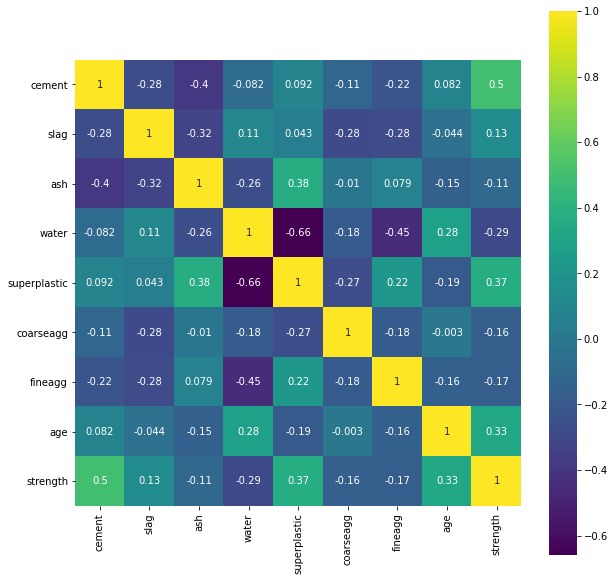

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),square=True,annot=True,cmap='viridis');

## **Now Splitting The data into target and other input**

In [12]:
X = data.drop('strength',axis=1)
Y = data['strength']

In [13]:
X

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [14]:
type(Y)

pandas.core.series.Series

In [15]:
Y=np.asarray(Y)

In [16]:
print(type(Y))
Y

<class 'numpy.ndarray'>


array([79.99, 61.89, 40.27, ..., 23.7 , 32.77, 32.4 ])

## **Splitting the data into training and testing**

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3,random_state=1)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(721, 8)
(721,)
(309, 8)
(309,)


# **Preparing the Data**
**Normalizing**

In [19]:
mean = X_train.mean(axis=0)
X_train -= mean

std = X_train.std(axis=0)
X_train /= std
X_test -=mean
X_test /=std

# **Building Network**

In [34]:
from keras import models
from keras import layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(10, activation = 'relu', input_shape = (X_train.shape[1],)))
  model.add(layers.Dense(8,activation='relu'))
  model.add(layers.Dense(6,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer= 'rmsprop', loss='mse', metrics = ['mae'])
  return model

# **K-Fold Validation**

In [35]:
k=5
num_val_samples = len(X_train) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print("Processing Fold #", i)
  val_data = X_train[i * num_val_samples : (i+1) * num_val_samples]
  val_targets = y_train[i * num_val_samples : (i+1) * num_val_samples]
  partial_train_data = np.concatenate([X_train[:i * num_val_samples], X_train[(i+1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([y_train[:i * num_val_samples], y_train[(i+1) * num_val_samples:]],axis=0)

  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose = 1)
  val_mse, val_mae =model.evaluate(val_data, val_targets, verbose = 1)
  all_scores.append(val_mae)

Processing Fold # 0
Epoch 1/100
577/577 [==============================] - 1s 992us/step - loss: 1481.2049 - mae: 34.0418
Epoch 2/100
577/577 [==============================] - 1s 1ms/step - loss: 380.0093 - mae: 14.5046
Epoch 3/100
577/577 [==============================] - 1s 981us/step - loss: 172.7239 - mae: 10.2346
Epoch 4/100
577/577 [==============================] - 1s 1ms/step - loss: 183.6573 - mae: 10.6608
Epoch 5/100
577/577 [==============================] - 1s 1ms/step - loss: 171.3843 - mae: 10.3338
Epoch 6/100
577/577 [==============================] - 1s 990us/step - loss: 134.7130 - mae: 9.0962
Epoch 7/100
577/577 [==============================] - 1s 1ms/step - loss: 134.7728 - mae: 8.9841
Epoch 8/100
577/577 [==============================] - 1s 970us/step - loss: 152.2197 - mae: 9.4740
Epoch 9/100
577/577 [==============================] - 1s 1ms/step - loss: 137.1113 - mae: 8.9506
Epoch 10/100
577/577 [==============================] - 1s 1ms/step - loss: 117.0191

**Running this with num_epochs = 100 yields the following results:**

In [36]:
all_scores

[4.526918411254883,
 14.46436595916748,
 4.280233383178711,
 5.026652812957764,
 5.1478118896484375]

In [37]:

np.mean(all_scores)

6.689196491241455

# **Saving the Validation Log at each fold**

In [38]:
num_epochs = 200
all_mae_histories = []
for i in range(k):
  print("Processing Fold #", i)
  val_data = X_train[i * num_val_samples : (i+1) * num_val_samples]
  val_targets = y_train[i * num_val_samples : (i+1) * num_val_samples]
  partial_train_data = np.concatenate([X_train[:i * num_val_samples], X_train[(i+1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([y_train[:i * num_val_samples], y_train[(i+1) * num_val_samples:]],axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, validation_data = (val_data,val_targets),epochs = num_epochs, batch_size = 1, verbose = 1)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)  

Processing Fold # 0
Epoch 1/200
577/577 [==============================] - 1s 1ms/step - loss: 1443.6650 - mae: 33.3961 - val_loss: 729.3333 - val_mae: 22.1095
Epoch 2/200
577/577 [==============================] - 1s 1ms/step - loss: 605.3335 - mae: 19.7126 - val_loss: 289.8705 - val_mae: 13.5283
Epoch 3/200
577/577 [==============================] - 1s 1ms/step - loss: 256.3844 - mae: 12.8415 - val_loss: 197.0190 - val_mae: 10.8416
Epoch 4/200
577/577 [==============================] - 1s 1ms/step - loss: 172.9653 - mae: 10.6393 - val_loss: 175.7907 - val_mae: 10.4109
Epoch 5/200
577/577 [==============================] - 1s 1ms/step - loss: 146.3034 - mae: 9.5887 - val_loss: 162.8238 - val_mae: 9.9035
Epoch 6/200
577/577 [==============================] - 1s 1ms/step - loss: 140.0274 - mae: 9.5156 - val_loss: 153.8619 - val_mae: 9.5832
Epoch 7/200
577/577 [==============================] - 1s 1ms/step - loss: 111.5110 - mae: 8.4154 - val_loss: 148.6641 - val_mae: 9.3089
Epoch 8/200


You can then compute the average of the per-epoch MAE scores for all folds

In [39]:
average_mae_history = [np.mean( [x[i] for x in all_mae_histories] ) for i in range(num_epochs)]

In [40]:
print(average_mae_history)
print("Length of Average MAE History",len(average_mae_history))

[24.051200485229494, 12.870056915283204, 10.61699275970459, 9.85297451019287, 9.443536186218262, 9.17749080657959, 8.919328689575195, 8.805818367004395, 8.573656177520752, 8.288271141052245, 8.157992267608643, 8.036654663085937, 7.803729057312012, 7.678539371490478, 7.521582317352295, 7.3601305961608885, 7.115284156799317, 7.029809856414795, 6.865042972564697, 6.717988586425781, 6.518788146972656, 6.467108345031738, 6.412306118011474, 6.312661170959473, 6.239829730987549, 6.091196060180664, 6.070342540740967, 5.962748718261719, 6.107667922973633, 5.912691879272461, 5.873287200927734, 5.77138671875, 5.704705429077149, 5.628927326202392, 5.592794895172119, 5.529071044921875, 5.474403381347656, 5.386332988739014, 5.52152099609375, 5.415525341033936, 5.299059200286865, 5.194495773315429, 5.19989013671875, 5.179366970062256, 5.146749210357666, 5.174309635162354, 5.090011405944824, 5.183032417297364, 5.148688125610351, 5.112984848022461, 5.166826820373535, 5.097412490844727, 5.02802591323852

## **Plotting Validation Score**

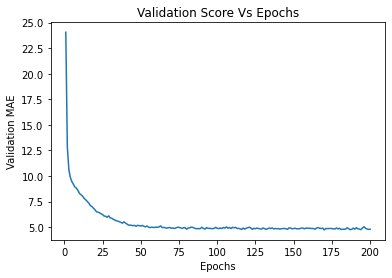

In [41]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1 ), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title("Validation Score Vs Epochs")
plt.show()

# **Plotting validation scores, excluding the first 10 data points**

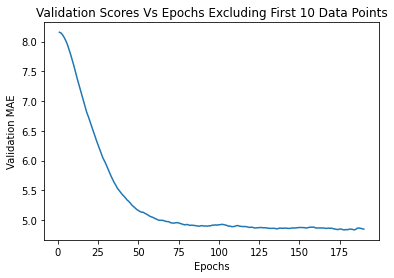

In [42]:
def smooth_curve(points, factor= 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1,len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title('Validation Scores Vs Epochs Excluding First 10 Data Points')
plt.show()

In [44]:
from tensorflow.keras import models
from tensorflow.keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.02),input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32,kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.02) ,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [45]:
history = model.fit(X_train,y_train,epochs=500,batch_size=128,validation_data=(val_data,val_targets))

Epoch 1/500
6/6 [==============================] - 1s 45ms/step - loss: 1567.2691 - mae: 35.7382 - val_loss: 1625.9575 - val_mae: 36.3502
Epoch 2/500
6/6 [==============================] - 0s 10ms/step - loss: 1501.7284 - mae: 34.8867 - val_loss: 1600.4540 - val_mae: 36.0104
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 1499.1477 - mae: 34.7780 - val_loss: 1571.2897 - val_mae: 35.6133
Epoch 4/500
6/6 [==============================] - 0s 10ms/step - loss: 1463.8933 - mae: 34.4395 - val_loss: 1538.7935 - val_mae: 35.1717
Epoch 5/500
6/6 [==============================] - 0s 11ms/step - loss: 1451.5733 - mae: 34.0996 - val_loss: 1502.4794 - val_mae: 34.6718
Epoch 6/500
6/6 [==============================] - 0s 11ms/step - loss: 1410.8263 - mae: 33.6379 - val_loss: 1460.5837 - val_mae: 34.0887
Epoch 7/500
6/6 [==============================] - 0s 10ms/step - loss: 1366.0354 - mae: 32.9111 - val_loss: 1412.3276 - val_mae: 33.4132
Epoch 8/500
6/6 [=================

In [46]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 120.2203 - mae: 8.9346


In [47]:
print("test_mae_score:",test_mae_score)
print("test_mse_score:",test_mse_score)

test_mae_score: 8.934609413146973
test_mse_score: 120.22034454345703


# **Retraining the model with changing Hyperparameters**

In [49]:
from tensorflow.keras import models
from tensorflow.keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.02),input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8,kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6,kernel_regularizer=regularizers.l2(0.02) ,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [50]:
history = model.fit(X_train,y_train,epochs=500,batch_size=64,validation_data=(val_data,val_targets))

Epoch 1/500
12/12 [==============================] - 1s 20ms/step - loss: 1527.6372 - mae: 35.3188 - val_loss: 1641.5931 - val_mae: 36.5931
Epoch 2/500
12/12 [==============================] - 0s 5ms/step - loss: 1556.3228 - mae: 35.7012 - val_loss: 1634.8424 - val_mae: 36.4995
Epoch 3/500
12/12 [==============================] - 0s 6ms/step - loss: 1499.3890 - mae: 34.9183 - val_loss: 1629.3080 - val_mae: 36.4233
Epoch 4/500
12/12 [==============================] - 0s 5ms/step - loss: 1544.3198 - mae: 35.5257 - val_loss: 1622.6942 - val_mae: 36.3342
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 1557.6701 - mae: 35.4593 - val_loss: 1616.9985 - val_mae: 36.2559
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 1563.6130 - mae: 35.6565 - val_loss: 1610.8113 - val_mae: 36.1719
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 1543.6973 - mae: 35.2995 - val_loss: 1603.5679 - val_mae: 36.0761
Epoch 8/500
12/12 [=======

# **Final Model**

In [51]:
from tensorflow.keras import models
from tensorflow.keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.02),input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32,kernel_regularizer=regularizers.l2(0.02) ,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [52]:
history = model.fit(X_train,y_train,epochs=1000,batch_size=128,validation_data=(val_data,val_targets))

Epoch 1/1000
6/6 [==============================] - 1s 46ms/step - loss: 1493.2372 - mae: 34.6769 - val_loss: 1563.3384 - val_mae: 35.4572
Epoch 2/1000
6/6 [==============================] - 0s 11ms/step - loss: 1461.9864 - mae: 34.2843 - val_loss: 1458.1621 - val_mae: 33.9613
Epoch 3/1000
6/6 [==============================] - 0s 12ms/step - loss: 1308.9096 - mae: 31.9835 - val_loss: 1310.9474 - val_mae: 31.7827
Epoch 4/1000
6/6 [==============================] - 0s 12ms/step - loss: 1173.4934 - mae: 29.7961 - val_loss: 1130.9465 - val_mae: 28.9525
Epoch 5/1000
6/6 [==============================] - 0s 12ms/step - loss: 975.5769 - mae: 26.3208 - val_loss: 927.1150 - val_mae: 25.4837
Epoch 6/1000
6/6 [==============================] - 0s 11ms/step - loss: 832.3171 - mae: 23.9549 - val_loss: 728.4389 - val_mae: 21.9188
Epoch 7/1000
6/6 [==============================] - 0s 11ms/step - loss: 701.8269 - mae: 21.4751 - val_loss: 554.2399 - val_mae: 18.5252
Epoch 8/1000
6/6 [===============

In [54]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 46.2091 - mae: 4.9636


In [55]:
print("test_mae_score:",test_mae_score)
print("test_mse_score:",test_mse_score)

test_mae_score: 4.963603973388672
test_mse_score: 46.209129333496094
